# ABALONE -Python Machine Learning-Sudha Udayakumar


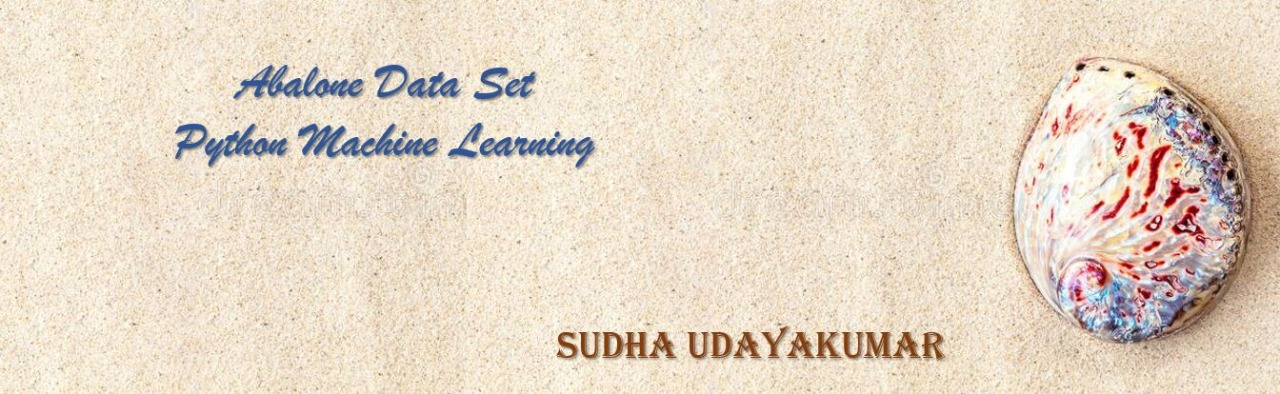

# Introduction (Define Problem)

## Problem Statement (Summarized)

# Choose Right Tools

## Importing and Installing the Right Packages

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Handling Warnings

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

# Loading Data

In [5]:
 # Importing training dataset using pd.read_csv from github. Not saving the file locally 
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [6]:
#save the CSV file to a local folder, so that we can use it while uploading to Github & Then commentig it out 
#df.to_csv("abalone.csv")

# Initial Analysis of Data

In [7]:
# to have a quick glance of data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


<span style='background:yellow'>Observation: The data is loading properly and we can see the various columns and target variable </span>

In [8]:
df.shape

(4177, 9)

<span style='background:yellow'>Observation: There are 4177 rows and 9 columns, including the target column  </span>

In [9]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

<span style='background:yellow'>Observation: As seen in the head file, Sex is an object, Rings are integer and all others are float  </span>

In [10]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

<span style='background:yellow'>Observation: Sex has only 3 values, Rings have 28 values and other columns have lot of ranges in them </span>

In [11]:
df["Rings"].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

<span style='background:yellow'>Observation:Looking closer at our target column, the data is not equally balanced. We need to handle it as well. Also 28 is missing </span>

In [12]:
df["Sex"].value_counts(normalize=True)*100

M   36.58
I   32.13
F   31.29
Name: Sex, dtype: float64

In [13]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<span style='background:yellow'>Observation: There is no missing data and so no further updates needed for missing data  </span>

In [14]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.07,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,0.61,0.48,0.17,1.15,0.50,0.25,0.33,11.00
max,0.81,0.65,1.13,2.83,1.49,0.76,1.00,29.00


<span style='background:yellow'>Observation: </span>

1)No Feature has Minimum Value = 0, except Height
2)All Features are not Normally Distributed, ( Theortically if feature is normally distributed, Mean = Median = Mode ).
3)But Features are close to Normality
4)All numerical, Except Sex
5)Each Feature has Different Scale



In [15]:
df[df.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.43,0.34,0.00,0.43,0.21,0.09,0.12,8
3996,I,0.32,0.23,0.00,0.13,0.06,0.03,0.35,6


<span style='background:yellow'>Observation: If we see the height is 0, for 2 rows. And both are Infant. So it could be it was too small to measure or not included. Since it is only 2 values, we will leave them as it is. And lets double check the describe again, without these 2 rows</span>

In [16]:
df[df.Height > 0].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.00,4175.00,4175.00,4175.00,4175.00,4175.00,4175.00,4175.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.94
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.07,0.06,0.01,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,0.61,0.48,0.17,1.15,0.50,0.25,0.33,11.00
max,0.81,0.65,1.13,2.83,1.49,0.76,1.00,29.00


<span style='background:yellow'>Observation:Now we see a similar value, just that the height minimum is not 0, but close to it 0.01, so we will retain the "0" in height  </span>

# EDA

## UniVariate Analysis

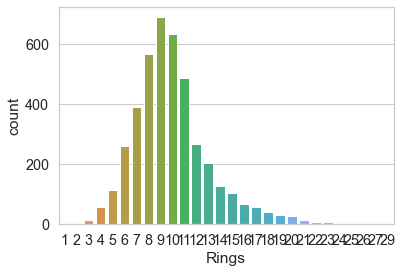

In [17]:
sns.countplot(df["Rings"])

<span style='background:yellow'>Observation:The Rings are not balanced and we have have high data around the middle  </span>

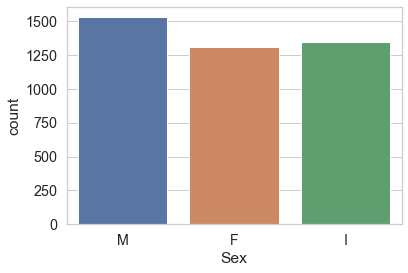

In [18]:
sns.countplot(df["Sex"])

<span style='background:yellow'>Observation: Male/Female & Infant are almost equally distributed. With Male being higher  </span>

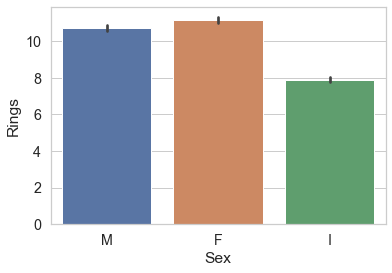

In [19]:

sns.barplot(x="Sex", y="Rings", data=df)


<span style='background:yellow'>Observation:Female have higher Rings, so is their life span higher ? As rings and age is related. Infants as expected have lower rings. Male is almost close to the Female  </span>

# Making the Target Variable a Balanced Data

In [20]:
df["Rings"].value_counts(bins=3)

(0.971, 10.333]     2730
(10.333, 19.667]    1385
(19.667, 29.0]        62
Name: Rings, dtype: int64

In [21]:
df["Rings"].value_counts(normalize=True,sort=True)*100


9    16.50
10   15.18
8    13.60
11   11.66
7     9.36
12    6.39
6     6.20
13    4.86
14    3.02
5     2.75
15    2.47
16    1.60
17    1.39
4     1.36
18    1.01
19    0.77
20    0.62
3     0.36
21    0.34
23    0.22
22    0.14
24    0.05
27    0.05
1     0.02
25    0.02
2     0.02
26    0.02
29    0.02
Name: Rings, dtype: float64

<span style='background:yellow'>Observation: when we see the percentage we see that category 8,9,10,11 have close 55% of data. So we need to categorize them in a better way, before we analyse the data further  </span>

In [22]:
bins = [0,8,10,df['Rings'].max()]
group_name = ['young','medium','old']
df['Rings'] = pd.cut(df['Rings'],bins, labels = group_name)

<span style='background:yellow'>Observation: As we saw, the concentration is higher in 8,9,10,11. So we have split the data based on the available values </span>

In [23]:
df["Rings"].value_counts(normalize=True,sort=True)*100

old      34.64
young    33.68
medium   31.67
Name: Rings, dtype: float64

<span style='background:yellow'>Observation: Our data is split into 3 categories and our data is now balanced </span>

In [24]:
dictionary = {'young':0, 'medium':1, 'old':2}
df['Rings'] = df['Rings'].map(dictionary)

<span style='background:yellow'>Observation: Its more easier to convert these age categories through numbers, we can also apply label encoder. We will be applying Label Encoder for "Sex", so here to try a different approach we are doing a rename of the columns </span>

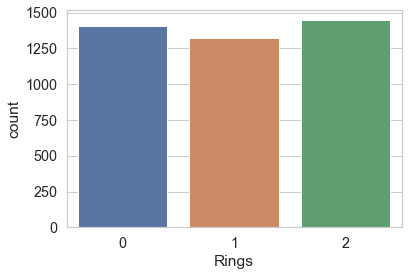

In [25]:
sns.countplot(df["Rings"])

<span style='background:yellow'>Observation: Visual Plot of the 3 categories of our Target Variable and also we can see their equal spread as well </span>

# EDA- Bi-Variate Analysis

<span style='background:pink'>Note: Now that our target variable is converted to our Machine LEarnig Model form, lets do the Bi-Variate Analysis. Since we have not increased the data by SAMPLING or SMOTE to handle Imbalance, we can directly do Bi-Variate analysis now. </span>

In [26]:
features=df.drop(columns=['Rings','Sex'])
#We are dropping Rings, as it is the Variable with which we are going to compare. 
#We are dropping Sex, as it is a classification data, and wont work in the loop below
#both these have been analysed in Univariate Analysis. Target Column as Rings, And Rings Vs Sex

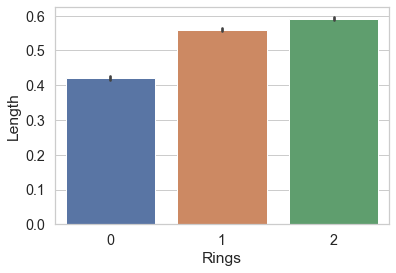

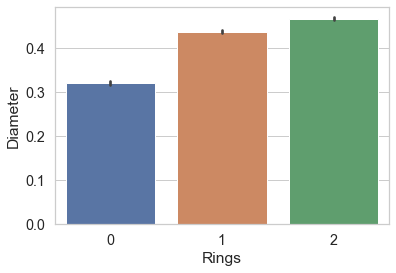

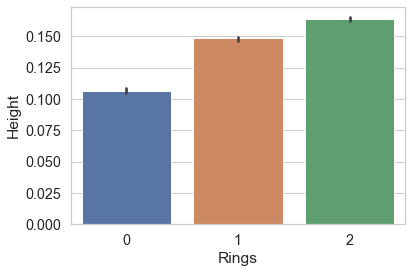

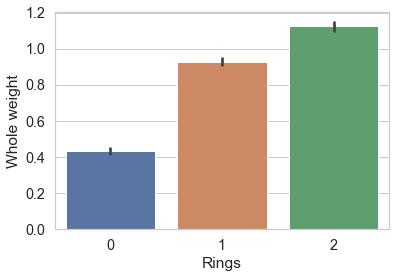

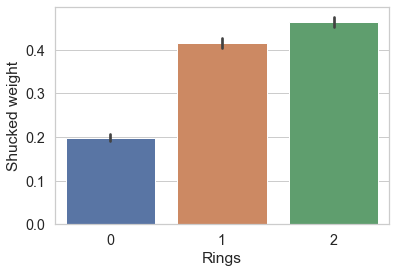

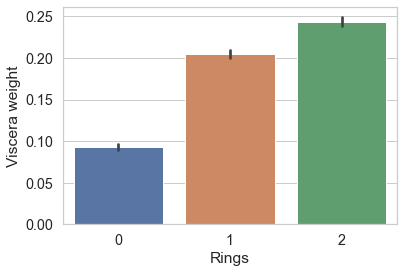

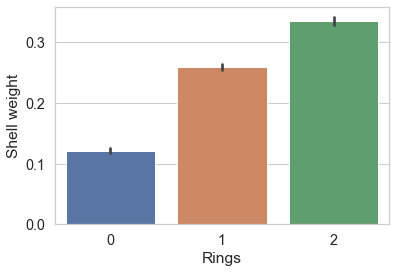

In [27]:
for col in features.columns:
    
    plt.figure()
    sns.barplot(x="Rings",y=features[col],data=df)
     

plt.show()

<span style='background:yellow'>Observation:As humans /animals grow their height and weight will increase gradually. The same pattern we are seeing across all features 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight' . This confirms our categorization is correct as well. A double tick </span>

# Multi-Variate Analysis

In [28]:
dfcor=df.corr()
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Length,1.00,0.99,0.83,0.93,0.90,0.90,0.90
Diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91
Height,0.83,0.83,1.00,0.82,0.77,0.80,0.82
Whole weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96
Shucked weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88
Viscera weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91
Shell weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00


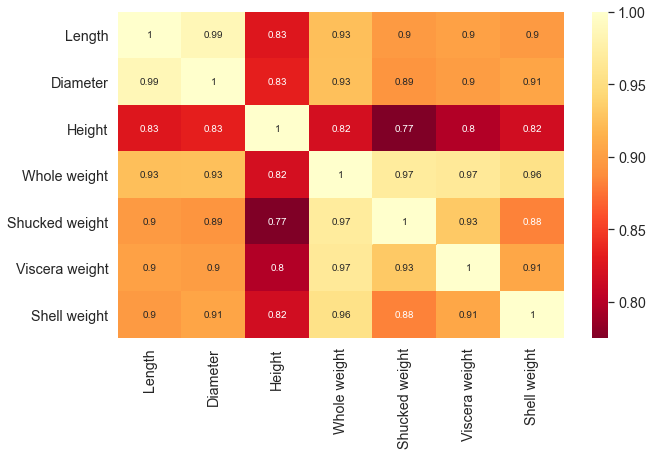

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

<span style='background:yellow'>Observation: As discussed earlier, as the length increases the diamer, height and weight increasees as well  </span>

# Label Encoding

<span style='background:Pink'>Note: Only the "Sex" column has to be label encoded, before Model Building, as it is classified as M, F, I (male, female, infant) </span>

In [30]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [31]:
LE=LabelEncoder()
df["Sex"] = LE.fit_transform(df["Sex"])


In [32]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

<span style='background:yellow'>Observation: Before Label Encoding our Values were M, I, F now it is changed to 2,1,0  </span>

# Skewness & Outliers

<span style='background:pink'>Observation: For classification data we dont handle skewness & outliers, but for regression we will handle the skewness </span>

In [33]:
df.skew()

Sex              -0.10
Length           -0.64
Diameter         -0.61
Height            3.13
Whole weight      0.53
Shucked weight    0.72
Viscera weight    0.59
Shell weight      0.62
Rings            -0.02
dtype: float64

In [34]:
#before treating skewnees lets divide the dataset into input and output
skew_x=df.drop(columns=["Rings","Sex"])
skew_x.skew()

Length           -0.64
Diameter         -0.61
Height            3.13
Whole weight      0.53
Shucked weight    0.72
Viscera weight    0.59
Shell weight      0.62
dtype: float64

In [35]:

#Now lets remove the skewness
for index in skew_x.skew().index:
    if skew_x.skew().loc[index]>0.5:
        skew_x[index]=np.log1p(skew_x[index])
    if skew_x.skew().loc[index]<-0.5:
        skew_x[index]=np.square(skew_x[index])

In [36]:
skew_x.skew()

Length           -0.07
Diameter         -0.03
Height            1.10
Whole weight     -0.04
Shucked weight    0.31
Viscera weight    0.38
Shell weight      0.32
dtype: float64

<span style='background:yellow'>Observation:We have handled the skewness in the continuous data, and see if the model gives a better performance  </span>

# Model Building

# Classification Model building- with the Modified data

## Importing Libraries for Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Splitting into Train & Test Data

In [38]:
x=df.drop("Rings",axis=1)
x.head()



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.46,0.36,0.10,0.51,0.22,0.10,0.15
1,2,0.35,0.27,0.09,0.23,0.10,0.05,0.07
2,0,0.53,0.42,0.14,0.68,0.26,0.14,0.21
3,2,0.44,0.36,0.12,0.52,0.22,0.11,0.15
4,1,0.33,0.26,0.08,0.20,0.09,0.04,0.06


In [39]:
y=df["Rings"]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3341, 8)
(836, 8)
(3341,)
(836,)


In [41]:
y_train.value_counts()

2    1157
0    1126
1    1058
Name: Rings, dtype: int64

In [42]:
y_test.value_counts()

2    290
0    281
1    265
Name: Rings, dtype: int64

<span style='background:yellow'>Observation: Since we have used stratify, we see that the same % split on y_train  & y_test </span>

## Finding Best Random State

In [43]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is ", maxAccu,"on Random_state  ",maxRs)

Best accuracy is  0.5982596084118926 on Random_state   176


<span style='background:yellow'>Observation: Let us use the best random state identified in our model building  </span>

## Building Model inMultiple Ways

### Instantiating the Model

In [44]:
# Since this is a Classification dataset, lets use the following Algos and instantiate them

gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
sv=SVC()

## Building models and printing the evaluation Score

In [45]:
model=[gnb,rf,ad,dtc,sv]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("\n Accuracy score: of ",m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print("mean of cross val with scoring= accuarcy:",score.mean())
    print("***************************************")


 Accuracy score: of  GaussianNB()
0.5634517766497462
[[336  90  14]
 [103 167 173]
 [ 62 160 274]]
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       440
           1       0.40      0.38      0.39       443
           2       0.59      0.55      0.57       496

    accuracy                           0.56      1379
   macro avg       0.56      0.56      0.56      1379
weighted avg       0.56      0.56      0.56      1379

[0.5562201  0.53588517 0.60479042 0.5748503  0.58443114]
mean of cross val with scoring= accuarcy: 0.5712354238890639
***************************************

 Accuracy score: of  RandomForestClassifier()
0.6439448875997099
[[325  88  27]
 [ 68 216 159]
 [ 17 132 347]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       440
           1       0.50      0.49      0.49       443
           2       0.65      0.70      0.67       496

    accuracy                   

In [46]:
modelList=[("Dec Tree Classifier", dtc),("Random Forest Class",rf),("Naive Bayes-G", gnb),("Support Vector",sv)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)
    ModelName= []
    modelAccuracy=[]
    modelCrossval=[]
    AccuracyCVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        modelAccuracy.append(accuracy)
        crossAcc=cross_val_score(modelInstance,x,y,cv=5).mean()
        modelCrossval.append(crossAcc)
        AccuracyCVDiff.append(accuracy-crossAcc)
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Accuracy": modelAccuracy,
                         "CrossValidation":modelCrossval,
                          "Difference in Accuracy & CV": AccuracyCVDiff
                        })
    return df_acc
GetAccuracy(x,y,modelList)

,Name,Accuracy,CrossValidation,Difference in Accuracy & CV
0,Dec Tree Classifier,0.59,0.57,0.02
1,Random Forest Class,0.66,0.63,0.03
2,Naive Bayes-G,0.60,0.57,0.03
3,Support Vector,0.65,0.62,0.03


<span style='background:yellow'>Observation: This was our end goal and we got the accuracy, however it is not a great one, so lets modify our data and build other models, to see if we can improve accuracy </span>

# Classification model- dropping sex

In [47]:
x=df.drop([ "Sex", "Rings"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3341, 7)
(836, 7)
(3341,)
(836,)


In [49]:
modelList=[("Dec Tree Classifier", dtc),("Random Forest Class",rf),("Naive Bayes-G", gnb),("Support Vector",sv)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92)
    ModelName= []
    modelAccuracy=[]
    modelCrossval=[]
    AccuracyCVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        modelAccuracy.append(accuracy)
        crossAcc=cross_val_score(modelInstance,x,y,cv=5).mean()
        modelCrossval.append(crossAcc)
        AccuracyCVDiff.append(accuracy-crossAcc)
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Accuracy": modelAccuracy,
                         "CrossValidation":modelCrossval,
                          "Difference in Accuracy & CV": AccuracyCVDiff
                        })
    return df_acc
GetAccuracy(x,y,modelList)

,Name,Accuracy,CrossValidation,Difference in Accuracy & CV
0,Dec Tree Classifier,0.56,0.55,0.01
1,Random Forest Class,0.60,0.63,-0.03
2,Naive Bayes-G,0.57,0.57,-0.01
3,Support Vector,0.62,0.65,-0.03


<span style='background:yellow'>Observation: Here we dropped the classification column "sex" still we dont see any improvement, lets check other methods </span>

# Classification model- Applying Skewness

In [50]:
x=skew_x
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.21,0.13,0.09,0.41,0.20,0.10,0.14
1,0.12,0.07,0.09,0.20,0.09,0.05,0.07
2,0.28,0.18,0.13,0.52,0.23,0.13,0.19
3,0.19,0.13,0.12,0.42,0.20,0.11,0.14
4,0.11,0.07,0.08,0.19,0.09,0.04,0.05


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=176)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3341, 7)
(836, 7)
(3341,)
(836,)


In [52]:
modelList=[("Dec Tree Classifier", dtc),("Random Forest Class",rf),("Naive Bayes-G", gnb),("Support Vector",sv)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92)
    ModelName= []
    modelAccuracy=[]
    modelCrossval=[]
    AccuracyCVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        modelAccuracy.append(accuracy)
        crossAcc=cross_val_score(modelInstance,x,y,cv=5).mean()
        modelCrossval.append(crossAcc)
        AccuracyCVDiff.append(accuracy-crossAcc)
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Accuracy": modelAccuracy,
                         "CrossValidation":modelCrossval,
                          "Difference in Accuracy & CV": AccuracyCVDiff
                        })
    return df_acc
GetAccuracy(x,y,modelList)

,Name,Accuracy,CrossValidation,Difference in Accuracy & CV
0,Dec Tree Classifier,0.56,0.56,0.00
1,Random Forest Class,0.60,0.63,-0.03
2,Naive Bayes-G,0.56,0.57,-0.01
3,Support Vector,0.63,0.65,-0.02


<span style='background:yellow'>Observation: We removed skewness and still the model is not great, so lets continue to do more types of model building </span>

# Classification model building- Binomial Classification

In [53]:
df_new=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


In [54]:
bins = [0,9,df_new['Rings'].max()]
group_name = ['0','1']
df_new['Rings'] = pd.cut(df_new['Rings'],bins, labels = group_name)

In [55]:
x=df_new.drop([ "Sex", "Rings"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06


In [56]:
y=df_new["Rings"]

In [57]:
xb_train,xb_test,yb_train,yb_test=train_test_split(x,y,test_size=.20,random_state=176)
print(xb_train.shape)
print(xb_test.shape)
print(yb_train.shape)
print(yb_test.shape)

(3341, 7)
(836, 7)
(3341,)
(836,)


In [58]:
lg=LogisticRegression()

In [59]:
modelList=[("Log Reg", lg), ("Dec Tree Classifier", dtc),("Random Forest Class",rf),("Naive Bayes-G", gnb),("Support Vector",sv)]

def GetAccuracy(x,y,modelList):
    xb_train,xb_test,yb_train,yb_test=train_test_split(x,y,random_state=92)
    ModelName= []
    modelAccuracy=[]
    modelCrossval=[]
    AccuracyCVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(xb_train,yb_train)
        pred=modelInstance.predict(xb_test)
        accuracy=accuracy_score(yb_test,pred)
        modelAccuracy.append(accuracy)
        crossAcc=cross_val_score(modelInstance,x,y,cv=5).mean()
        modelCrossval.append(crossAcc)
        AccuracyCVDiff.append(accuracy-crossAcc)
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Accuracy": modelAccuracy,
                         "CrossValidation":modelCrossval,
                          "Difference in Accuracy & CV": AccuracyCVDiff
                        })
    return df_acc
GetAccuracy(x,y,modelList)

,Name,Accuracy,CrossValidation,Difference in Accuracy & CV
0,Log Reg,0.74,0.78,-0.03
1,Dec Tree Classifier,0.69,0.73,-0.03
2,Random Forest Class,0.77,0.78,-0.02
3,Naive Bayes-G,0.70,0.73,-0.04
4,Support Vector,0.76,0.78,-0.03


<span style='background:yellow'>Observation: Here the score are so much better. Target column have 2 classes instead of 3, has improved the model significantly. the least absolute difference between accuracy and Cross validation is Random Forest, so lets use it in our hyper parameter tuning  </span>

# Regression Model Building

In [60]:
df_reg=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df_reg.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


In [61]:
df_reg.skew()

Length           -0.64
Diameter         -0.61
Height            3.13
Whole weight      0.53
Shucked weight    0.72
Viscera weight    0.59
Shell weight      0.62
Rings             1.11
dtype: float64

In [62]:
df_reg_skew=df_reg.drop(columns=["Rings","Sex"])
df_reg_skew.skew()

Length           -0.64
Diameter         -0.61
Height            3.13
Whole weight      0.53
Shucked weight    0.72
Viscera weight    0.59
Shell weight      0.62
dtype: float64

In [63]:

#Now lets remove the skewness
for index in df_reg_skew.skew().index:
    if df_reg_skew.skew().loc[index]>0.5:
        df_reg_skew[index]=np.log1p(df_reg_skew[index])
    if df_reg_skew.skew().loc[index]<-0.5:
        df_reg_skew[index]=np.square(df_reg_skew[index])

In [64]:
df_reg_skew.skew()

Length           -0.07
Diameter         -0.03
Height            1.10
Whole weight     -0.04
Shucked weight    0.31
Viscera weight    0.38
Shell weight      0.32
dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt

In [66]:
x=df_reg_skew
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.21,0.13,0.09,0.41,0.20,0.10,0.14
1,0.12,0.07,0.09,0.20,0.09,0.05,0.07
2,0.28,0.18,0.13,0.52,0.23,0.13,0.19
3,0.19,0.13,0.12,0.42,0.20,0.11,0.14
4,0.11,0.07,0.08,0.19,0.09,0.04,0.05


In [67]:
y=df_reg['Rings']
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [68]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x,y,test_size=.20,random_state=43)
print(xr_train.shape)
print(xr_test.shape)
print(yr_train.shape)
print(yr_test.shape)

(3341, 7)
(836, 7)
(3341,)
(836,)


In [69]:
lm=LinearRegression()
ridge = Ridge()
gb= GradientBoostingRegressor()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()
knn = KNeighborsRegressor()

In [70]:
modelList=[("Lin Reg", lm), ("Ridge", ridge),("Gradient boost",gb),("Decision Tree", dt),("Random Forest",rf),("Kneigbor",knn)]

def GetAccuracy(x,y,modelList):
    xr_train,xr_test,yr_train,yr_test=train_test_split(x,y,random_state=43)
    modelerror=[]
    ModelName= []
    modelR2=[]
    modelMAE=[]
    modelMSE=[]
    modelRMSE=[]
    modelCrossval=[]
    R2CVDiff=[]
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(xr_train,yr_train)
        pred=modelInstance.predict(xr_test)
        error=modelInstance.score(xr_train,yr_train)
        modelerror.append(error)
        r2=r2_score(yr_test,pred)
        modelR2.append(r2)
        mae = mean_absolute_error(yr_test,pred)
        modelMAE.append(mae)
        MSE=mean_squared_error(yr_test,pred)
        modelMSE.append(MSE)
        RMSE=sqrt(mean_squared_error(yr_test,pred))
        modelRMSE.append(RMSE)
        
        crossAcc=cross_val_score(modelInstance,x,y,cv=5,scoring='r2').mean()
        modelCrossval.append(crossAcc)
        R2CVDiff.append(r2-crossAcc)
        
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Error":modelerror,
                         "R2": modelR2,
                         "MAE": modelMAE,
                         "MSE": modelMSE,
                         "RMSE": modelRMSE,                         
                         "CrossValidation":modelCrossval,
                         "R2CVDiff":R2CVDiff
                          })
    return df_acc
GetAccuracy(x,y,modelList)
    

,Name,Error,R2,MAE,MSE,RMSE,CrossValidation,R2CVDiff
0,Lin Reg,0.55,0.58,1.51,4.11,2.03,0.44,0.14
1,Ridge,0.54,0.56,1.54,4.28,2.07,0.44,0.12
2,Gradient boost,0.65,0.58,1.49,4.14,2.04,0.44,0.13
3,Decision Tree,1.00,0.14,2.09,8.40,2.90,-0.16,0.30
4,Random Forest,0.93,0.55,1.52,4.35,2.09,0.44,0.12
5,Kneigbor,0.66,0.53,1.54,4.61,2.15,0.42,0.10


Find the difference between model accuracy (r2_score) and cross validation and the model with least difference will be your best model.

<span style='background:yellow'>Observation: THis experiment with also doing Regression was done as a sample. This is to see that a dataset with the same target can be done as classification or regression model. It depends on how we handle the target column before model building. This was only for a sample   </span>

# Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameters ={"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "criterion" : ["gini", "entropy"],              
             }

In [73]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [74]:
GCV.fit(xb_train,yb_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(6, 11)})

In [75]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 9}

In [78]:
mod=RandomForestClassifier(bootstrap= True, criterion='gini',max_depth=5,min_samples_leaf = 2, min_samples_split =9)
mod.fit(xb_train,yb_train)
pred=mod.predict(xb_test)
print(accuracy_score(yb_test,pred))

0.8038277511961722


<span style='background:yellow'>Observation: Earlier with RandomForest (Binomial MOdel building) it was at 77%, now it is at 80%, our hyperparameter tuning has improved the accuracy </span>

# Saving the model

In [79]:
import joblib
joblib.dump(mod,"abaolone.pkl")

['abaolone.pkl']

# Loading the Model

In [80]:
model=joblib.load("abaolone.pkl")

In [81]:
prediction=model.predict(xb_test)

In [83]:
print(accuracy_score(yb_test,pred))

0.8038277511961722


In [84]:
prediction=pd.DataFrame(prediction) #converting to a Data Frame

In [85]:
prediction.head()  #checking the top 5 values, to double check fi there are predictions

,0
0,0
1,1
2,0
3,0
4,0


<span style='background:yellow'>Observation: We have saved and loaded the model. The improved accuracy of 80% is also seen.  </span>

# Summary